![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

---
## Introduction to Data Visualization in Python

### Matplotlib 101

---


**Author list:** Alexander Fred Ojala

**License Agreement:** Feel free to do whatever you want with this code

___



Matplotlib is the standard plotting library in Python. It is well tested, well maintained and it has been around since ~2003. It also has a great support community.

Matplotlib is highly customizable and sometimes it takes a lot of code to make a plot look like you want. It would take over a semester to go through all of the commands and aspects in matplotlib, therefore this notebook only works as a gentle introduciton.

Many other plotting libraries (like `seaborn, pandas, bokeh, plotly, ` etc.) are built on top / integrates well with matplotlib. Therefore, it is an important package to know.

## Official gallery of matplotlib plot examples
<div class='alert alert-info'>Please visit the <a href='https://matplotlib.org/gallery.html'>`matplotlib gallery`</a> and look at all the different plots you can make</div>

# Load matplotlib

In [1]:
# Standard way to import matplotlib from scratch: import matplotlib.pyplot as plt
# you might also see import pylab, however the procedure below is preferred

import matplotlib.pyplot as plt # always import pyplot module as plt (standard)
import numpy as np
import pandas as pd

# set seed
np.random.seed(0)

# add IPython magic command %matplotlib inline 
# to print pyplot output inline in the notebook withput calling plt.show()
%matplotlib inline

# Increase standard plot size
plt.rcParams['figure.figsize'] = (7, 4.5)

# Two plotting approaches

There are two approaches to plotting the:
1. The functional / MATLAB approach
2. Object-oriented approach **(preferred)**

# 1. Functional / MATLAB plotting

Note that the command:
``` python
plt.plot(x,y)
```
will create a `figure object` ( the canvas that we plot on ) and an `axes object` that is the plot with lines and info. 

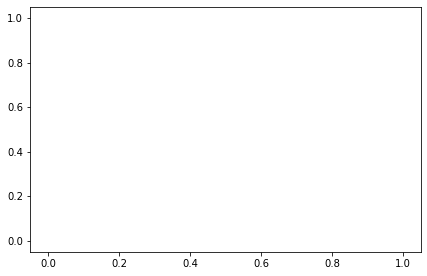

In [2]:
plt.plot(); # creates empty plot, semi colon suppresses text output

## Simple line plot

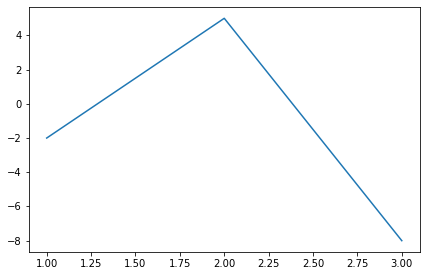

In [3]:
# Simple plot of two lists, note that they are of equal length
# plt.plot(x,y)

plt.plot([1,2,3],[-2,5,-8])
plt.show()  # Note: we don't have to run plt.show() 
            # if we have run  %matplotlib inline  once in the kernel session

## Plot 50 random numbers

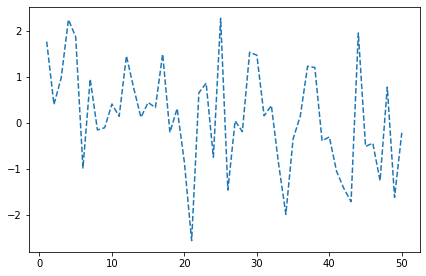

In [4]:
# every new cell where you run plt.plot() will create a new figure

N = 50 
x = np.arange(1,N+1)
y = np.random.randn(N)

plt.plot(x,y,linestyle='--') # example without plt.plot(), note this does not work in scripts

# Two line plots in the same figure

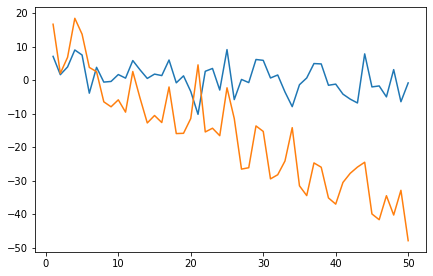

In [5]:
# if plt.plot(*args) are run in the same cell
# we will plot on the same axes

plt.plot(x,4*y)
plt.plot(x,np.abs(10*y)-x); # semi colon to suppress text output

#### New plot in one cell
`plt.figure()` creates a new figure in the same cell

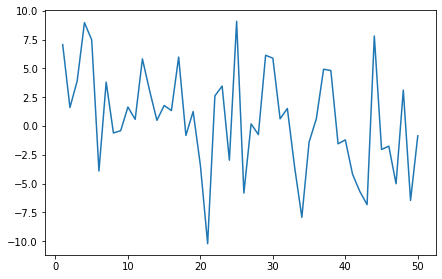

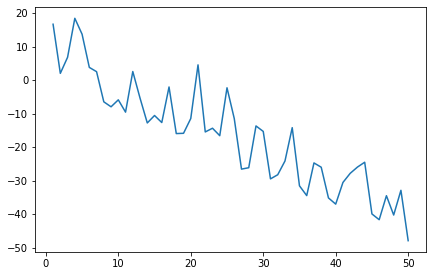

In [6]:
# if plt.plot(*args) are run in the same cell
# we will plot on the same axes

plt.figure()# create a new place
plt.plot(x,4*y)

plt.figure()
plt.plot(x,np.abs(10*y)-x);

# Scatter plot

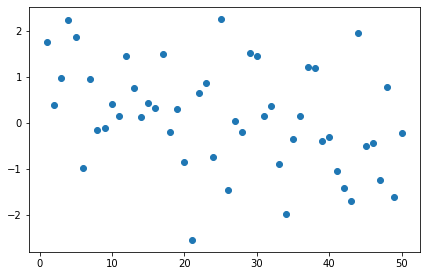

In [7]:
# Relationship between two variables
plt.scatter(x,y);

# Combine line and scatter plots

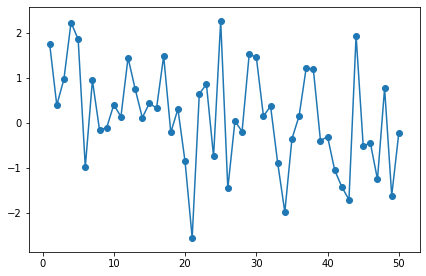

In [8]:
plt.plot(x,y)
plt.scatter(x,y);

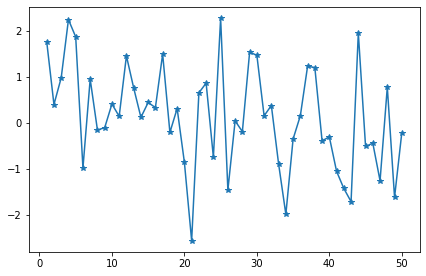

In [9]:
plt.plot(x,y,marker='*');

# Histograms

In [12]:
N=20
vals = np.random.randint(0,11,N)
print(sorted(vals))

[0, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, 7, 7, 9, 9, 9, 10, 10, 10]


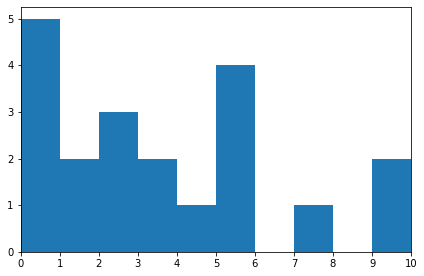

In [11]:
plt.xlim(0,10) # change limits of x axis
plt.xticks(np.arange(11)) # change ticks on x-axis
plt.hist(vals);

### Histogram with bins

In [14]:
bins = np.linspace(0,10,6)
bins

array([ 0.,  2.,  4.,  6.,  8., 10.])

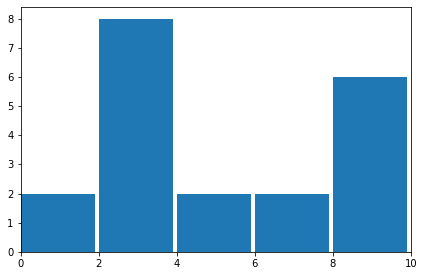

In [17]:
# histogram with bins
#bins = np.linspace(0,10,5)
plt.hist(vals,bins=bins,width=1.9) # change width of bars, so we can see space in between
plt.xlim(0,10)
plt.show()

# 2. Object-oriented approach (preferred approach)
The object-oriented approach is more powerful and should be used when you want more control of your visualization. Instead of letting matplotlib handle what figure and axes that is the current one, we assign the `figure` and `axes` objects to variables and apply functions via methods on them.
## Figures and axes objects

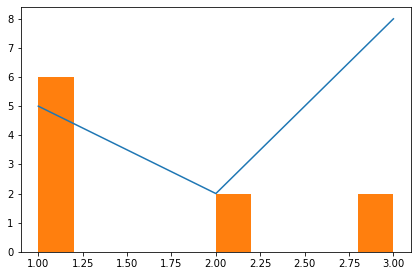

In [22]:
# simple plot

f, ax = plt.subplots() # returns tuple:
# f is the canvas object, can contain several plots i.e. axes objects (p)

ax.plot([1,2,3],[5,2,8]);
ax.hist(np.random.randint(1,4,10));

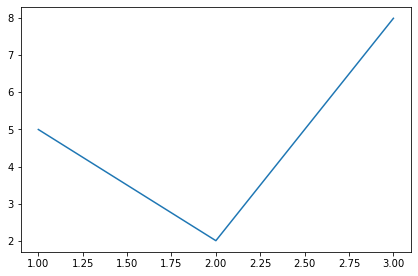

In [23]:
# Another approach, only create figure, then add subplots

f = plt.figure()
ax = f.add_subplot(1,1,1) # add subplot at location 1,1,1
# same as: ax = f.add_subplot(111)
ax.plot([1,2,3],[5,2,8])

# Several subplots on the same Figure

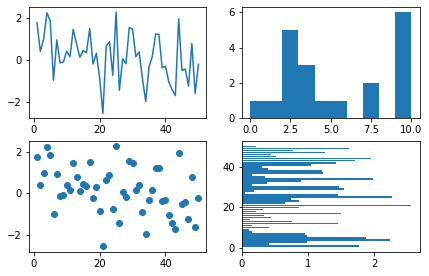

In [24]:
f, ax = plt.subplots(nrows=2,ncols=2)
# or
# f, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=2,ncols=2)

# or,
# fig = plt.figure()
# ax1 = plt.subplot(221) #2x2 grid, first plot
# ax2 = plt.subplot(222)
# ax3 = plt.subplot(223)
# ax4 = plt.subplot(224)
# ax1.plot(x,y) etc..

ax[0,0].plot(x, y)
ax[1,0].scatter(x, y)
ax[0,1].hist(vals)
ax[1,1].barh(x,np.abs(y));

# Custom subplot grids

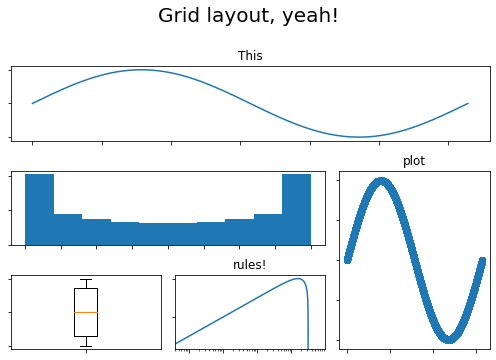

In [27]:
# We can make arbitrarly complicated subplot grids with plt.subplot2grid
# example taken from Python Bootcamp https://github.com/profjsb/python-bootcamp

x = np.linspace(0,2*np.pi,10000)
y1 = np.sin(x)
y2 = np.sin(x)**2

f = plt.figure()

# subplot2grid(grid_shape, loc_in_grid, rowspan=1, colspan=1)
# 3 x 3 grid

# Specify the grid
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3) # spans three cols
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2) # 3 
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

# remove tick labels on all axes
for ax in f.axes:
    for t in ax.get_xticklabels()+ax.get_yticklabels():
        t.set_visible(False)
    

# make a different kinds of plots!
ax1.plot(x, y1)
ax2.hist(y1)
ax3.scatter(x,y1)
ax4.boxplot(y1)
ax5.loglog(x, y1)

# Add titles
ax1.set_title('This')
ax3.set_title('plot')
ax5.set_title('rules!')
f.suptitle('Grid layout, yeah!',fontsize=20, y=1.1) # y location

f.tight_layout()    # great command for adding white space
                    # between plots


# 3. Plot styling

### Add labels, text, legend and change color

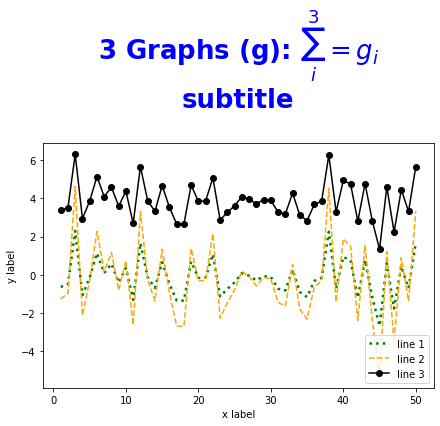

In [32]:
# Three different line plots on same axes

N = 50 
x = np.arange(1,N+1)
y = np.random.randn(N)

fig, ax = plt.subplots()

ax.plot(x,y,color='green', linestyle=':', label='line 1',linewidth = 2.5)
ax.plot(x,y*2,color='orange', linestyle='--', label = 'line 2')
ax.plot(x,y+4,color='black',marker='o', label = 'line 3')

ax.legend(loc=4) # location of legend is an integer, 
# for text to be correct in the legend the plots need a label

# add plot LaTex style title, with line breaks
ax.set_title('3 Graphs (g): $\sum^3_i= g_i$\nsubtitle\n',
             color='blue',fontweight='bold',fontsize=26) 


ax.set_xlabel('x label') # add xlabel
ax.set_ylabel('y label'); # add ylabel

# Custom legend

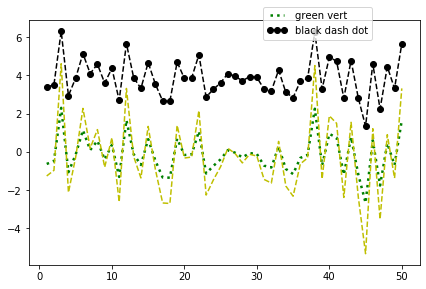

In [33]:
fig, ax = plt.subplots()

# ax.plot() returns a line object that we can assign to variables
# Note comma, in order to unpack tuple object

l1, = ax.plot(x,y,color='green', linestyle=':', label='line 1',linewidth = 2.5) 

l2, = ax.plot(x,y*2,'y--', label = 'line 2')
l3, = ax.plot(x,y+4,color='black', linestyle='--',marker='o', label = 'line 3')

ax.legend(handles=[l1, l3], labels=['green vert', 'black dash dot'],
              loc=[0.6,0.92],frameon=True,numpoints=3);

# Set limits and annotate values in the plot

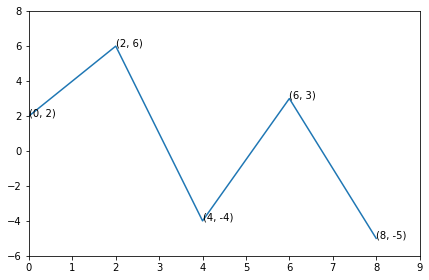

In [35]:
x = np.arange(0,10,2)
y = np.array([2,6,-4,3,-5])

fig, ax = plt.subplots()


ax.set_ylim(-6,8)
ax.set_xlim(0,9)
ax.plot(x,y)

for coord in zip(x, y):
    ax.annotate(s = str(coord),xy = coord) # coord = coordinates


# Double axis plot

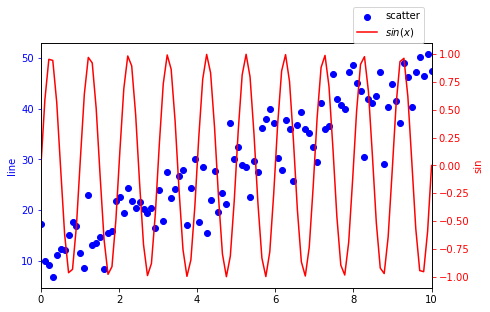

In [36]:
fig, ax1 = plt.subplots()

N = 100 # number of samples

err=np.random.randn(N)*5

x=np.linspace(0,10,N)

y=12+x*3.5+err
y2 = np.sin(2 * np.pi * x)

# plot

ax1.set_xlim(0,10)
l1 = ax1.scatter(x,y,color='blue',label='scatter')
ax1.set_ylabel('line',color='blue')
ax1.tick_params('y',colors='blue')


ax2 = ax1.twinx() # create second axis for y2
l2, = ax2.plot(x, y2, color='red',label='$sin(x)$')
ax2.set_ylabel('sin', color='red')
ax1.set_xlim(0,10)
ax2.tick_params('y', colors='red')

plt.legend((l1,l2),('scatter','$sin(x)$'),loc=[0.8,1]);

# Plot sharing x-axis & Saving plots

In [37]:
# Generate data
x = np.linspace(0,2*np.pi,51)
y1 = np.sin(x)
y2 = 2*np.sin(x)**2

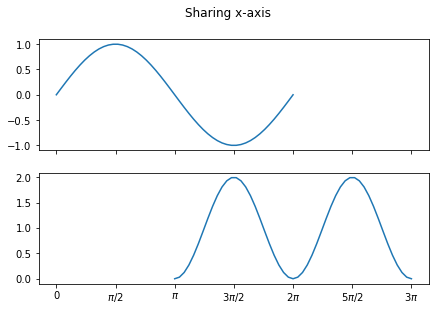

In [42]:
# Create two subplots, on two rows with two axes ax1 and ax2
f, (ax1, ax2) = plt.subplots(2, 1,sharex=True)

#f, (ax1, ax2) = plt.subplots(1,2) # Would be vertical

ax1.plot(x,y1)
ax2.plot(x + np.pi,y2)
# show ticks
plt.xticks(np.linspace(0,3*np.pi,7),
           ('0','$\pi/2$','$\pi$','$3\pi/2$','$2\pi$','$5\pi/2$','$3\pi$')); 

f.suptitle('Sharing x-axis'); # Title for both subplots

In [39]:
# Save fig as png
f.savefig('fig.png') # easy, png, svg, pdf, etc work
f.savefig('fig.svg')
# it will take on the file format

In [40]:
%ls # list files in your directory

Volume in drive D is Windows
 Volume Serial Number is EC40-79A2

 Directory of d:\Github\Others\DataX\02c-tools-matplotlib-seaborn-plotly


 Directory of d:\Github\Others\DataX\02c-tools-matplotlib-seaborn-plotly


 Directory of d:\Github\Others\DataX\02c-tools-matplotlib-seaborn-plotly


 Directory of d:\Github\Others\DataX\02c-tools-matplotlib-seaborn-plotly


 Directory of d:\Github\Others\DataX\02c-tools-matplotlib-seaborn-plotly


 Directory of d:\Github\Others\DataX\02c-tools-matplotlib-seaborn-plotly

File Not Found


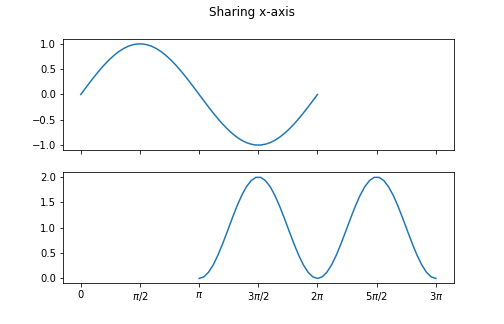

In [26]:
# display picture
from IPython.display import Image
Image(filename='fig.png') 

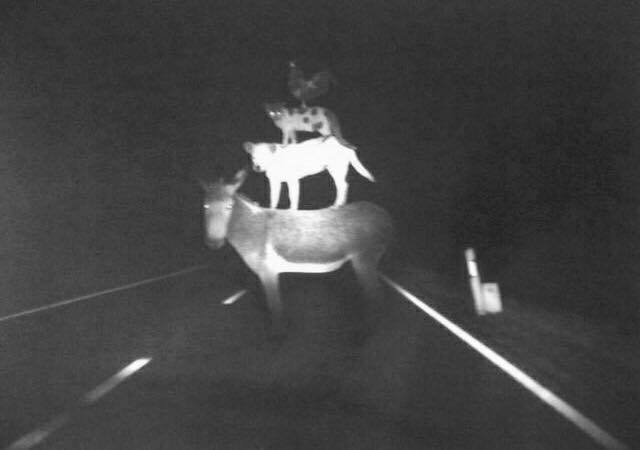

In [43]:
# display RANDOM image file
from IPython.display import Image
Image(filename='example.jpg') 

-----
## Opacity, marker size and color bar

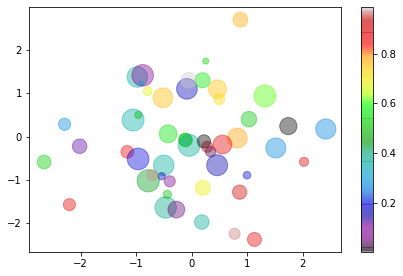

In [44]:
N=50

x = np.random.randn(N)
y = np.random.randn(N)
colors = np.random.rand(N)
sizes = N*10 * np.random.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.4, cmap='nipy_spectral')
plt.colorbar(); #this will add a color bar to the right

# 3d plot

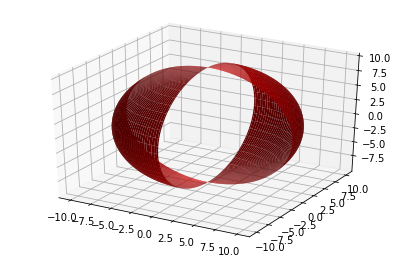

In [45]:
# Axes 3D needed to set projection='3d'
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data, spherical coordinates
u = np.linspace(0, .5*np.pi, 100)
v = np.linspace(0, 2*np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))


# Plot the surface
ax.plot_surface(x, y, z, color='r');

# Change the plot styles

Here is a link to some common styles: [matplotlib style gallery](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

In [46]:
# increase the figure size for all plots

IPython_default = plt.rcParams.copy() # save default styling

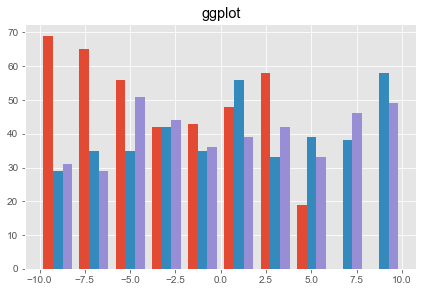

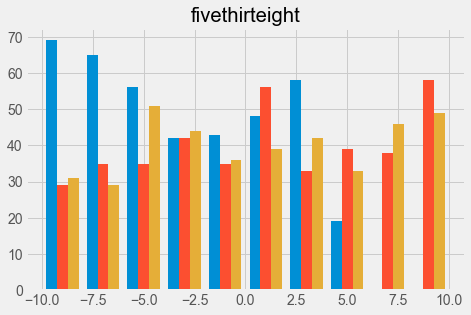

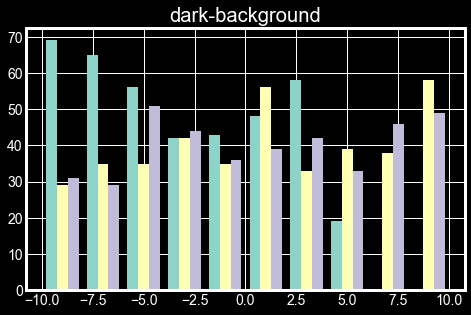

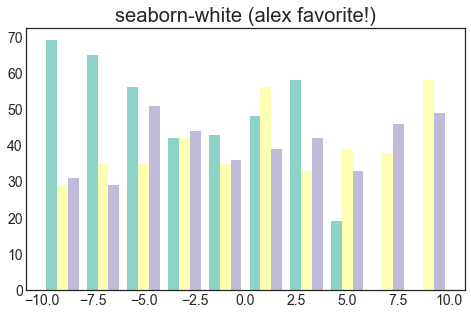

In [47]:
data1 = np.random.randint(-10,5,400)
data2 = np.random.randint(-10,11,400)
data3 = np.random.randint(-10,11,400)

plt.style.use('ggplot') # for R lovers
plt.figure()
plt.hist([data1,data2,data3])
plt.title('ggplot')


plt.style.use('fivethirtyeight')
plt.figure()
plt.hist([data1,data2,data3])
plt.title('fivethirteight')

plt.style.use('dark_background')
plt.figure()
plt.hist([data1,data2,data3])
plt.title('dark-background')

plt.style.use('seaborn-white') # classic MATLAB stylingnot that pretty
plt.figure()
plt.hist([data1,data2,data3])
plt.title('seaborn-white (alex favorite!)');

In [48]:
# You can also customize the 

plt.rcParams.update(IPython_default); # restore defaults

# Seaborn and pandas
**Note:** Anaconda does not come with seaborn, please install it in your virtual environment by running:
```bash
conda intall seaborn
```

- **seaborn:** Mostly used for statistical plotting, and better graphics. 
- **pandas:** Mostly used for quick plotting of DataFrames and time series

In [49]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("iris") # load classic ML dataset
df.head()

ModuleNotFoundError: No module named 'seaborn'

In [50]:
df.plot();

NameError: name 'df' is not defined

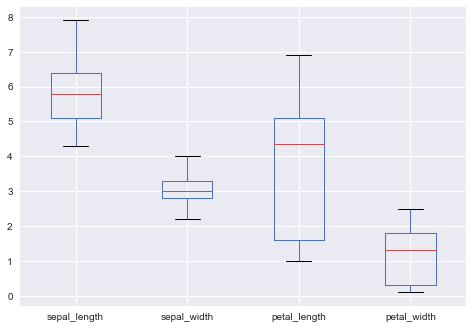

In [40]:
df.plot.box();

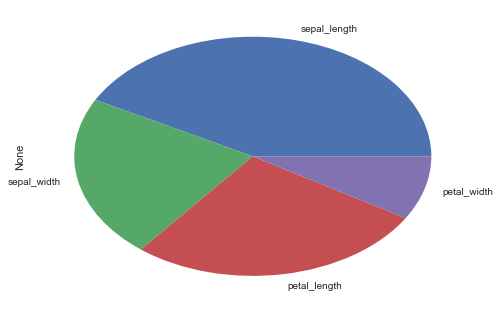

In [41]:
df.mean().plot.pie();

In [42]:
sp = list(df['species'].unique())
cols = list(['g','b','y'])
colors = dict(zip(sp,cols))
colors

{'setosa': 'g', 'versicolor': 'b', 'virginica': 'y'}

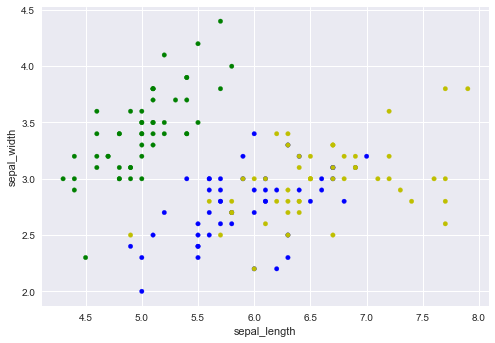

In [43]:
df.plot.scatter('sepal_length','sepal_width',c=df['species'].apply(lambda x: colors[x]))

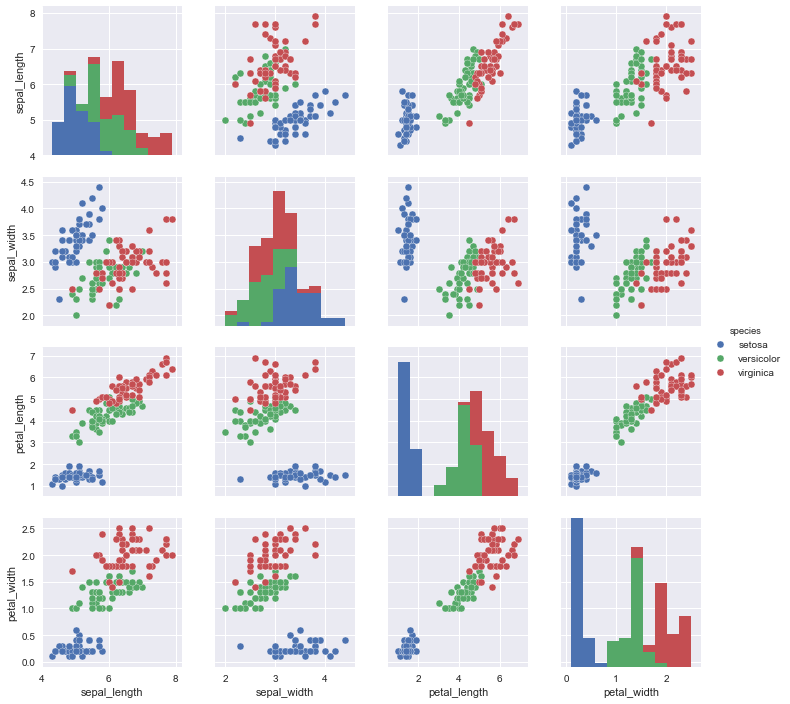

In [50]:
sns.pairplot(df, hue='species', size=2.5)

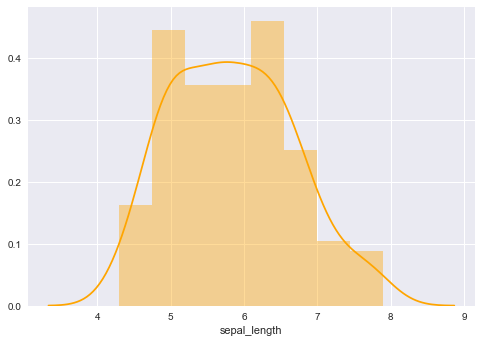

In [45]:
sns.distplot(df['sepal_length'],color='orange');

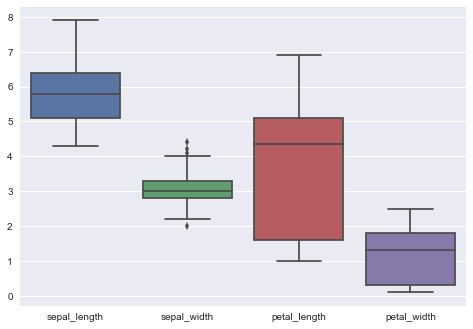

In [46]:
sns.boxplot(data=df);

# Other packages you can check out
Interactive plots
- [Bokeh](https://bokeh.pydata.org/)
- [Plotly](https://plot.ly/)

Declarative plotting
- [Altair](https://altair-viz.github.io/)
- [Vega](https://vega.github.io/vega/)